# 1. Import Libraries:

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 2. Data Exploration 

In [46]:
df = pd.read_csv("train.csv")

df.head()


,id,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,25.0,0.50,0.25,0.75,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,1,25.0,0.50,0.25,0.50,0.50,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201
2,2,12.5,0.25,0.25,0.63,0.63,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.552927,0.470853,38.341781,6869.77760
3,3,12.5,0.25,0.25,0.63,0.50,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.565976,0.478137,39.467561,6880.77590
4,4,25.0,0.50,0.25,0.63,0.63,77.4,46.8,64.7,55.8,27.0,45.8,24.0,0.39,0.579677,0.494165,40.484512,7479.93417


id                      0.000975
clonesize              -0.382619
honeybee               -0.118001
bumbles                 0.161145
andrena                 0.073969
osmia                   0.198264
MaxOfUpperTRange       -0.022517
MinOfUpperTRange       -0.021929
AverageOfUpperTRange   -0.021940
MaxOfLowerTRange       -0.022197
MinOfLowerTRange       -0.022319
AverageOfLowerTRange   -0.022081
RainingDays            -0.477191
AverageRainingDays     -0.483870
fruitset                0.885967
fruitmass               0.826481
seeds                   0.868853
yield                   1.000000
Name: yield, dtype: float64


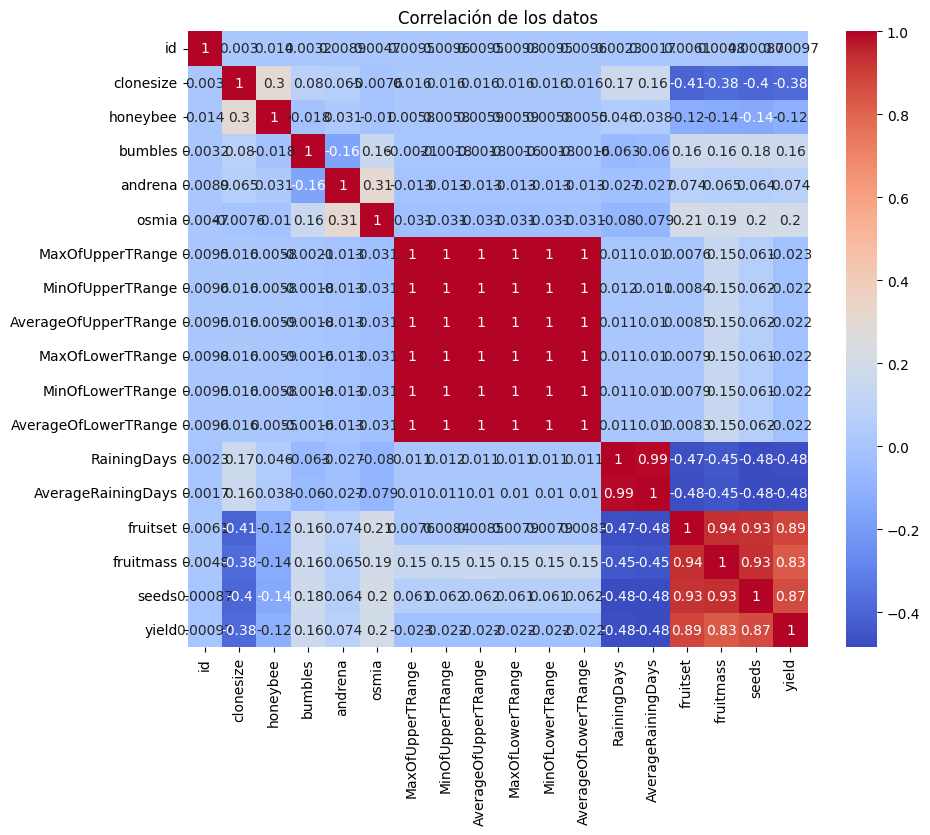

In [47]:
# Calcular la correlación entre los datos y "yield"
correlation = df.corr()['yield']

# Imprimir la correlación
print(correlation)

# Generar un mapa de calor de la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlación de los datos')
plt.show()


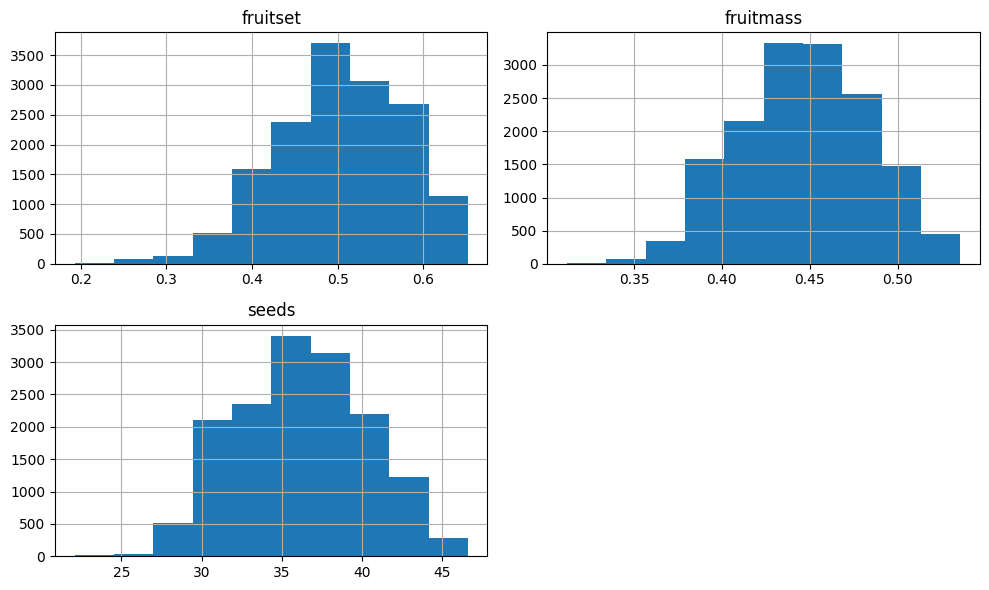

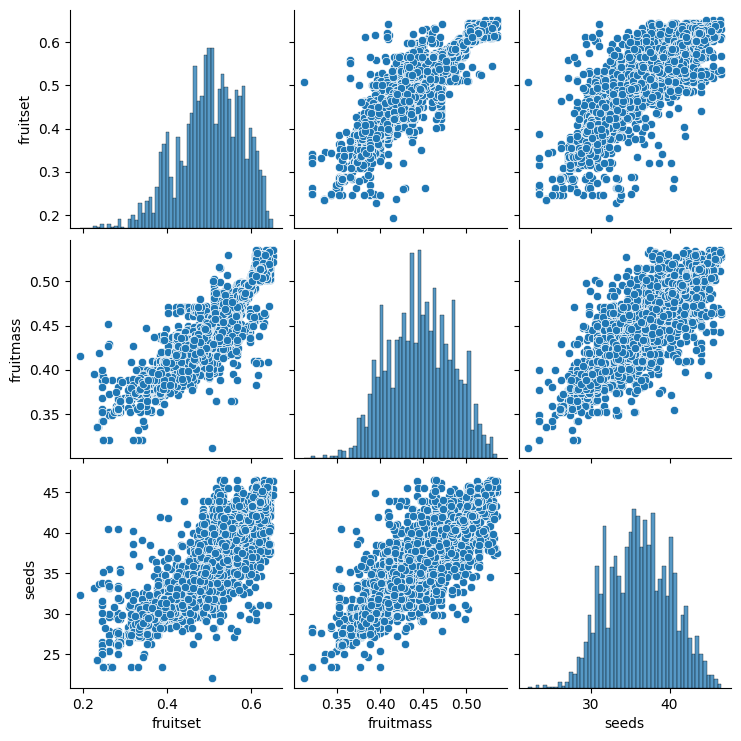

In [48]:

# Seleccionar las variables de interés
variables = ['fruitset', 'fruitmass', 'seeds']


# Visualizar distribución de las variables
df[variables].hist(bins=10, figsize=(10, 6))
plt.tight_layout()
plt.show()

# Visualizar relaciones entre las variables
sns.pairplot(df[variables])
plt.show()


# 3. Data Reproccesing

# 4. Feature Engineering

# 5. Train - Validation Split

In [65]:
from sklearn.model_selection import train_test_split

X = df[["fruitset", 'seeds', "fruitmass", 'osmia','andrena', 'honeybee', 'clonesize', 'RainingDays', "AverageRainingDays"]]
y = df["yield"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)




In [66]:
from sklearn.linear_model import LinearRegression

linealmodel=LinearRegression()
linealmodel.fit(X_train, y_train)

LinearRegression()

In [67]:
y_hat = linealmodel.predict(X_test)
y_hat

array([7586.10301543, 7252.04936407, 6732.55939249, ..., 4366.32605038,
       8269.91739767, 8010.68794607])

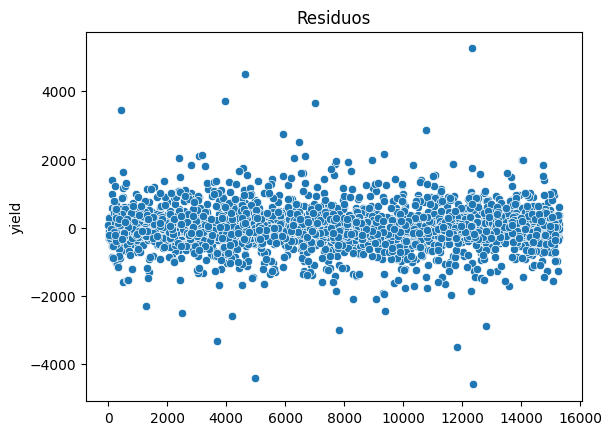

In [68]:
res = y_test - y_hat
sns.scatterplot(res)
plt.title("Residuos");

In [73]:
from sklearn.metrics import mean_absolute_error


mae = mean_absolute_error(y_test, y_hat)

print("MAE:", mae)

MAE: 370.1947254206459


# 6. Model Selection and Trainning

# 7. Model Evaluation

# 8. Hyperparameter Tunning

# 9. Final Model Selection and Evaluation 

In [70]:
df.head(2)


,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,25.0,0.5,0.25,0.75,0.5,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.425011,0.417545,32.460887,4476.81146
1,25.0,0.5,0.25,0.50,0.5,69.7,42.1,58.2,50.2,24.3,41.2,24.0,0.39,0.444908,0.422051,33.858317,5548.12201


# 10. Submission Preparation 

In [72]:
# Creamos el fichero de soluciones generado por nuestro modelo para enviar a Kaggle

def generate_submision_df(columns):
    df_test = pd.read_csv("test.csv")
    X_sub = df_test[["fruitset", 'seeds', "fruitmass", 'osmia','andrena', 'honeybee', 'clonesize', 'RainingDays', "AverageRainingDays"]]
    X_sub = X_sub[columns.values]
    
    
    return X_sub

def generate_submission_file(model, X, submission_number):
    df_test = pd.read_csv("test.csv")
    y = model.predict(X)
    df_test["y_test"] = y
    df_sub = pd.DataFrame({'Id': df_test['id'], 'yield': y})
    df_sub.to_csv(f"Submissions/submission_{submission_number}.csv", index=False)


X_sub = generate_submision_df(X_train.columns)
generate_submission_file(linealmodel, X_sub, 2)



# 11. Conclusion